In [35]:
import pandas as pd

file_path = 'cat-dataset.xlsx'
df = pd.read_excel(file_path)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5726 entries, 0 to 5725
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_number               5726 non-null   int64  
 1   Age                     5726 non-null   float64
 2   Gender                  5726 non-null   int64  
 3   Neuter_status           5726 non-null   int64  
 4   Breed_group             5726 non-null   object 
 5   Weaning_age             5726 non-null   int64  
 6   Outdoors                5726 non-null   int64  
 7   Other_cats              5726 non-null   int64  
 8   Activity_level          5726 non-null   int64  
 9   Contact_people          5726 non-null   int64  
 10  Aggression_stranger     5726 non-null   int64  
 11  Aggression_owner        5726 non-null   int64  
 12  Aggression_cats         5726 non-null   int64  
 13  Shyness_novel           5726 non-null   int64  
 14  Shyness_strangers       5726 non-null   

In [36]:
# Calcularea numarului duplicatelor
duplicates = df[df.duplicated()]
print(f"Numarul instantelor duplicate sunt: {duplicates.shape[0]}")

Numarul instantelor duplicate sunt: 0


In [37]:
df = df.drop(columns = ['ID_number'])

In [38]:
# Verificăm valorile lipsă
print("Numărul de valori lipsă pe fiecare coloană:")
print(df.isnull().sum())

Numărul de valori lipsă pe fiecare coloană:
Age                        0
Gender                     0
Neuter_status              0
Breed_group                0
Weaning_age                0
Outdoors                   0
Other_cats                 0
Activity_level             0
Contact_people             0
Aggression_stranger        0
Aggression_owner           0
Aggression_cats            0
Shyness_novel              0
Shyness_strangers          0
Grooming                  43
Wool_sucking              30
Behaviour_problem          7
Aggression_component       0
Shyness_component          0
Extraversion_component     0
dtype: int64


In [39]:
df['Grooming'] = df.groupby('Breed_group')['Grooming'].transform(lambda x: x.fillna(x.mean()))

df['Wool_sucking'] = df.groupby('Breed_group')['Wool_sucking'].transform(lambda x: x.fillna(x.mean()))

df['Behaviour_problem'] = df.groupby('Breed_group')['Behaviour_problem'].transform(lambda x: x.fillna(x.mean()))

In [40]:
df['Breed_group'].unique()

array(['BEN', 'BUR', 'EUR', 'BRI', 'SBI', 'ORI', 'MCO', 'ABY', 'HCS',
       'RAG', 'other', 'CRX', 'NFO', 'RUS', 'SIB', 'TUV', 'KOR', 'DRX',
       'PER'], dtype=object)

Breed_group
HCS      836
ABY      393
other    388
MCO      320
RAG      308
ORI      307
NFO      301
SIB      298
CRX      298
SBI      293
BUR      277
RUS      268
BRI      244
BEN      228
PER      226
DRX      213
EUR      185
KOR      174
TUV      169
Name: count, dtype: int64


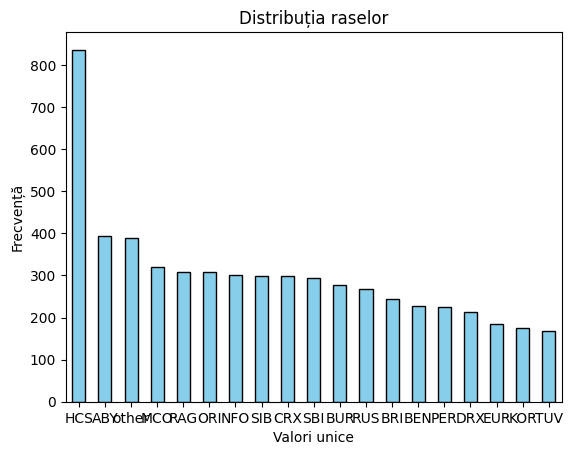

In [41]:
import matplotlib.pyplot as plt

# Calculăm frecvența fiecărei valori unice
distributie = df['Breed_group'].value_counts()

# Vizualizare tabelară
print(distributie)

# Reprezentare grafică (bar chart)
distributie.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Distribuția raselor")
plt.xlabel("Valori unice")
plt.ylabel("Frecvență")
plt.xticks(rotation=0)
plt.show()

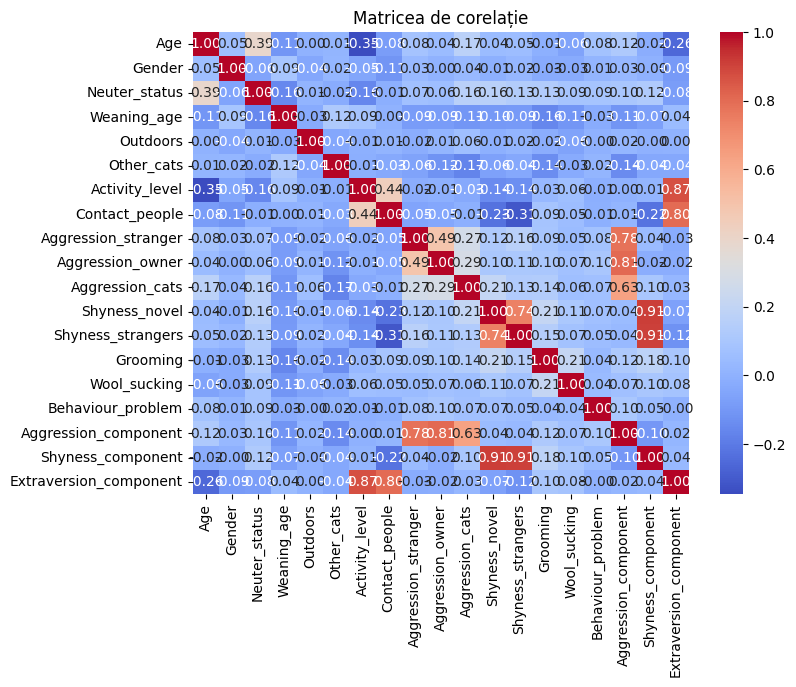

In [42]:
import seaborn as sns


correlation_matrix = df.drop(columns = ['Breed_group']).corr()

# Creăm heatmap-ul
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Matricea de corelație")
plt.show()

In [43]:
# Determinăm valorile unice pentru fiecare coloană
unique_values = {col: df[col].unique() for col in df.columns}

# Afișăm rezultatele
for col, values in unique_values.items():
    print(f"Coloana '{col}' are valorile unice: {values}")

Coloana 'Age' are valorile unice: [ 4.0274  2.1096  7.6822 ...  4.9096  3.6603 11.1151]
Coloana 'Gender' are valorile unice: [2 1]
Coloana 'Neuter_status' are valorile unice: [1 0]
Coloana 'Breed_group' are valorile unice: ['BEN' 'BUR' 'EUR' 'BRI' 'SBI' 'ORI' 'MCO' 'ABY' 'HCS' 'RAG' 'other' 'CRX'
 'NFO' 'RUS' 'SIB' 'TUV' 'KOR' 'DRX' 'PER']
Coloana 'Weaning_age' are valorile unice: [8 4 6 5 3 2 1 7]
Coloana 'Outdoors' are valorile unice: [0 4 5 1 3 2]
Coloana 'Other_cats' are valorile unice: [1 0]
Coloana 'Activity_level' are valorile unice: [4 5 3 2 1]
Coloana 'Contact_people' are valorile unice: [5 4 3 1 2]
Coloana 'Aggression_stranger' are valorile unice: [1 4 2 3 5]
Coloana 'Aggression_owner' are valorile unice: [1 2 3 5 4]
Coloana 'Aggression_cats' are valorile unice: [1 2 3 4 5]
Coloana 'Shyness_novel' are valorile unice: [2 3 1 4 5]
Coloana 'Shyness_strangers' are valorile unice: [1 3 2 4 5]
Coloana 'Grooming' are valorile unice: [1.         4.         3.         2.         5.   

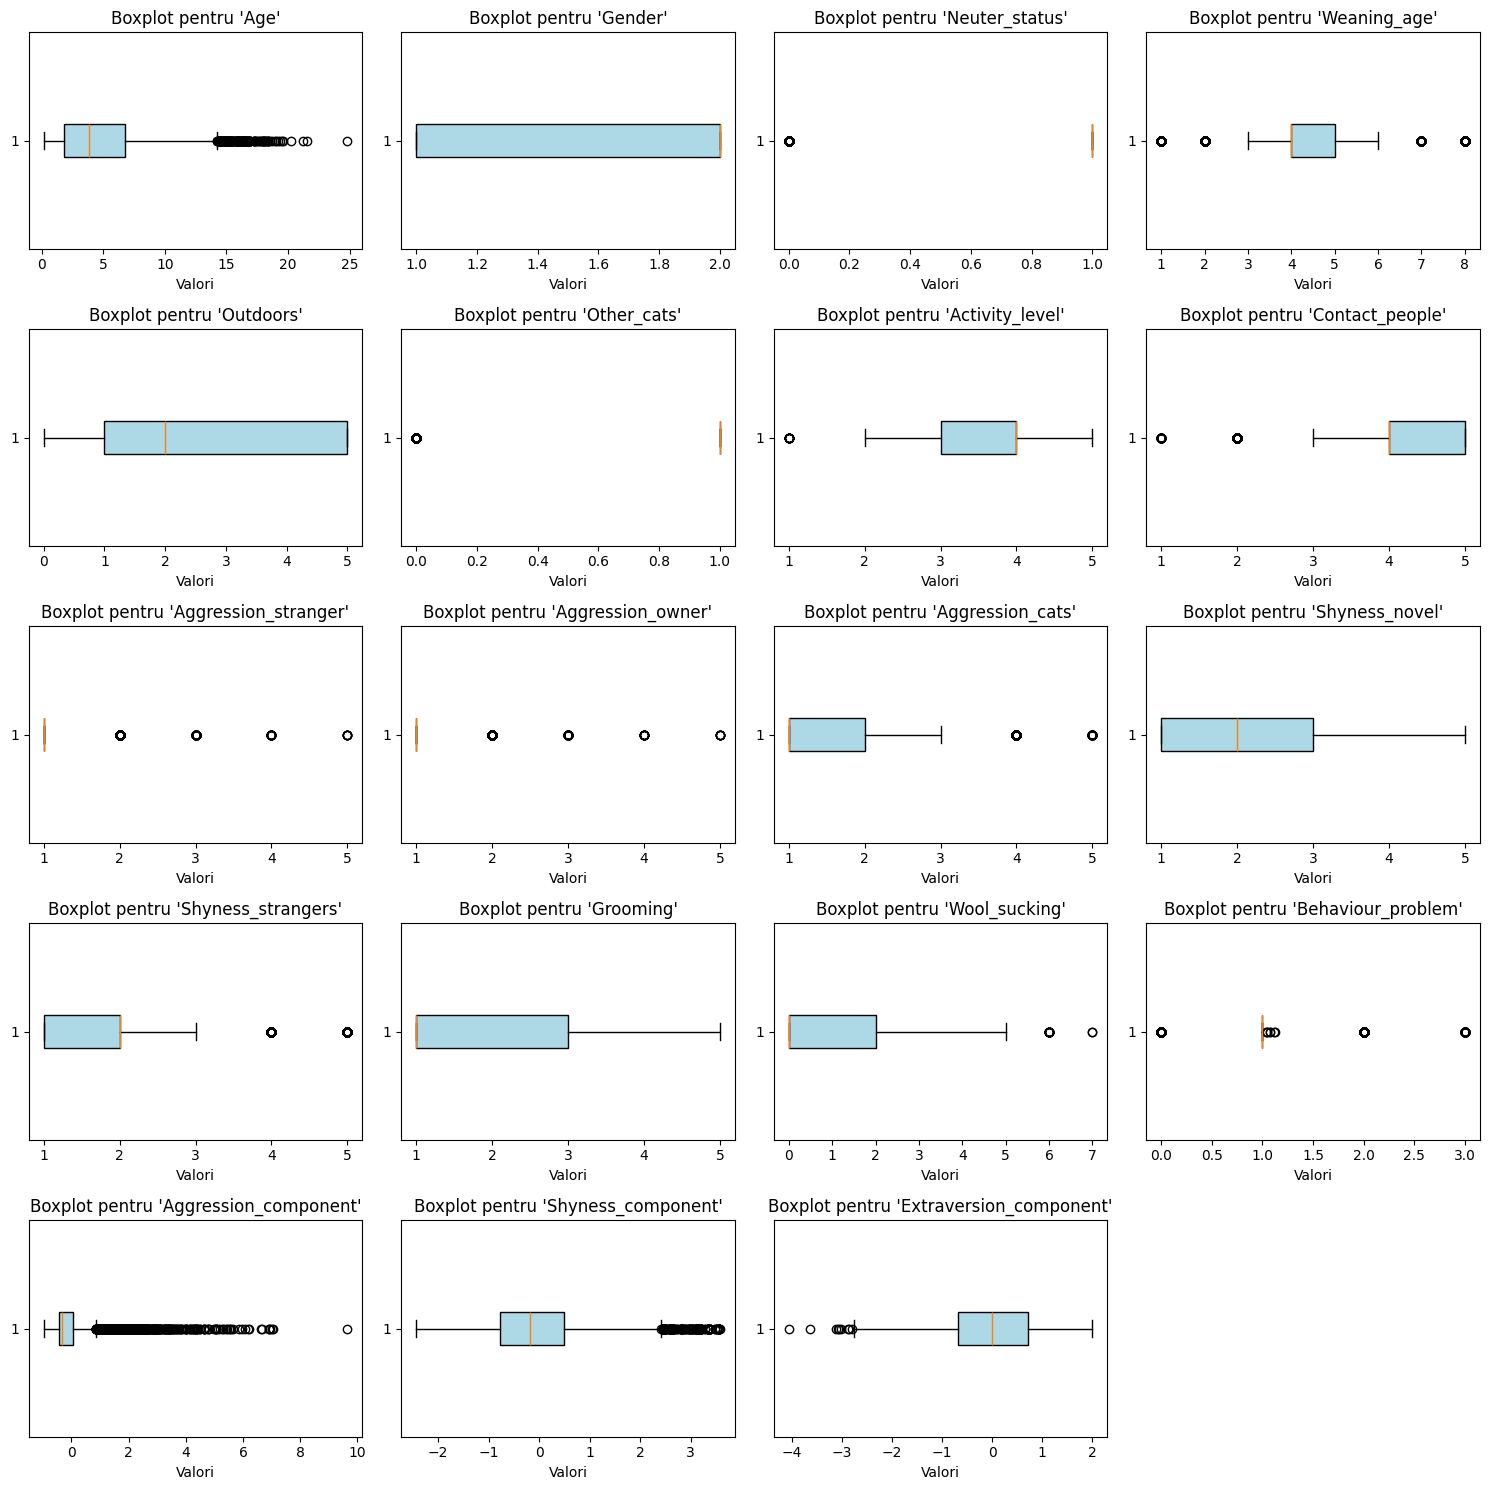

In [10]:
import math

# Selectăm coloanele numerice
numerical_columns = df.select_dtypes(include='number').columns

# Determinăm numărul de rânduri și coloane pentru subplots
num_cols = 4  # 4 boxplot-uri pe rând
num_rows = math.ceil(len(numerical_columns) / num_cols)  # Număr de rânduri necesar

# Creăm figura și grid-ul de subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 3 * num_rows))

# Aplatizăm axele pentru iterație ușoară (indiferent de numărul de coloane/rânduri)
axes = axes.flatten()

# Iterăm prin coloanele numerice și creăm boxplot-uri
for i, column in enumerate(numerical_columns):
    axes[i].boxplot(df[column], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f"Boxplot pentru '{column}'")
    axes[i].set_xlabel("Valori")

# Ascundem subplot-urile goale (dacă sunt mai multe subplots decât coloane)
for j in range(len(numerical_columns), len(axes)):
    axes[j].axis('off')

# Ajustăm spațiul dintre subplot-uri
plt.tight_layout()
plt.show()

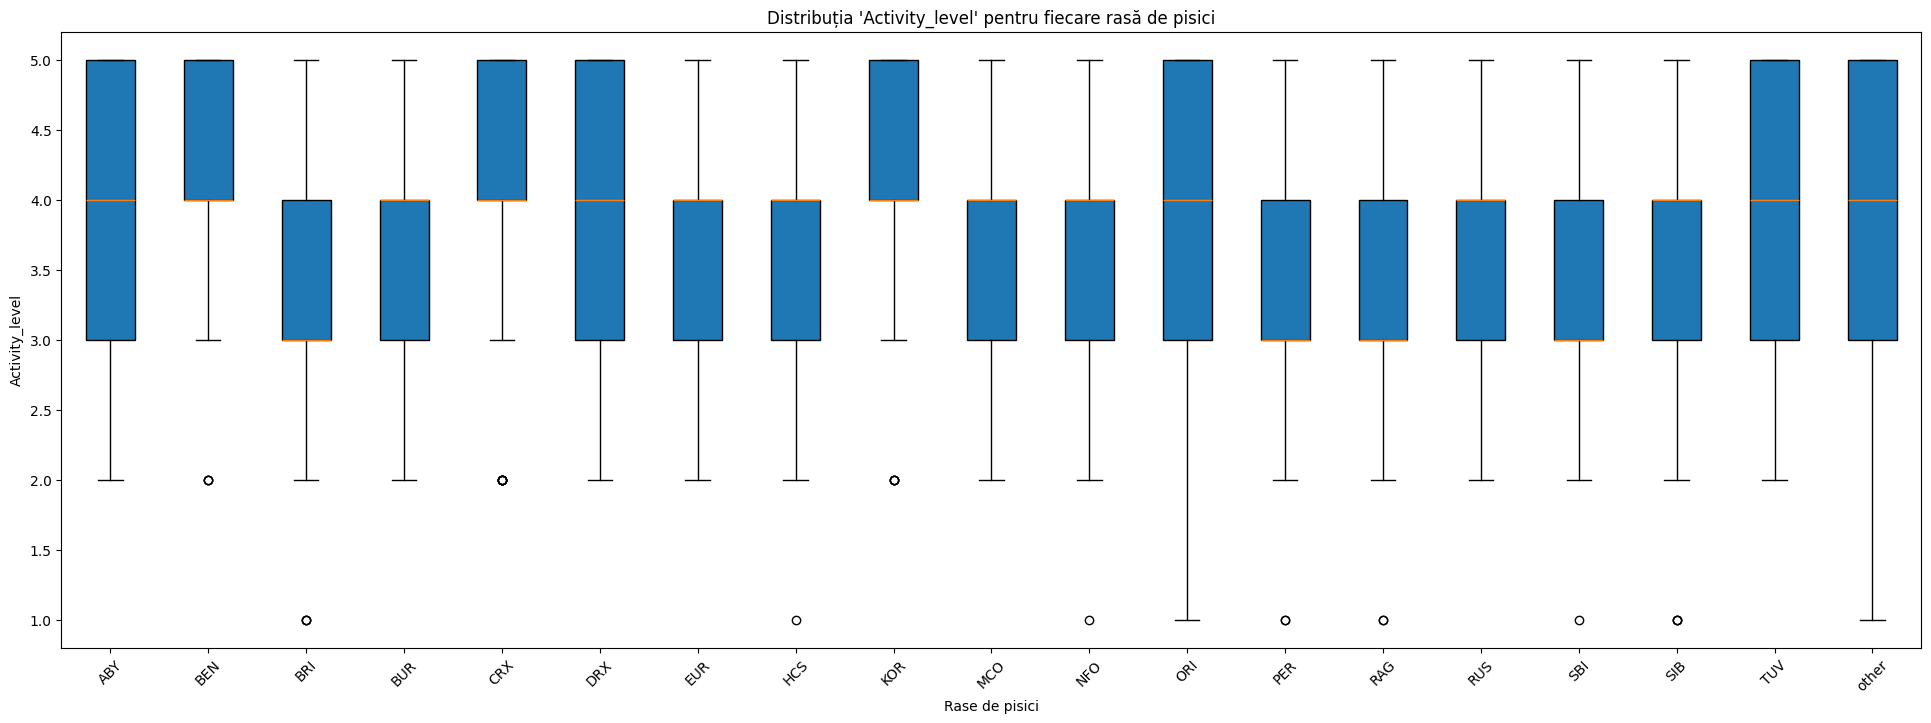

In [11]:
def show_boxplots_for_attribute(attribute):
    # Selectăm un atribut numeric și grupăm după 'Breed_group'
    groups = df.groupby('Breed_group')[attribute]

    # Creăm boxplot-uri pentru valorile atributului numeric pe rase
    plt.figure(figsize=(24, 8))  # Dimensiunea graficului
    plt.boxplot([group for name, group in groups], tick_labels=[name for name, group in groups], showfliers=True, patch_artist=True)

    # Adăugăm titluri și etichete
    plt.title(f"Distribuția '{attribute}' pentru fiecare rasă de pisici")
    plt.xlabel("Rase de pisici")
    plt.ylabel(attribute)

    # Afișăm graficul
    plt.xticks(rotation=45)  # Rotim etichetele de pe axa X pentru claritate
    plt.show()

show_boxplots_for_attribute('Activity_level')

In [26]:
# Functie care creaza un nou DataFrame denumit quartiles, care conține informații despre quartilele calculate (Q1 și Q3) pentru fiecare grup
# specificat în group_col (de exemplu, Breed_group).

# Calculăm quartilele în funcție de rasă și atribut
def calculate_quartiles(df, attribute):
    # Grupăm datele pe baza coloanei de grupare (ex: Breed_group)
    grouped = df.groupby('Breed_group')[attribute]

    # Calculăm Q1 și Q3 pentru fiecare grup
    quartiles = grouped.quantile([0.25, 0.75]).unstack()  # Unstack transformă indexul ierarhic în coloană
    quartiles.columns = ['Q1', 'Q3']  # Redenumim coloanele pentru claritate

    return quartiles

# Funcție pentru ajustarea outlierilor
def edit_outliers(df, attribute, breed):
    # Calculăm quartilele o singură dată
    quartiles = calculate_quartiles(df, attribute)

    # Obținem limitele pentru rasa curentă
    lower_bound = quartiles.loc[breed, 'Q1']
    upper_bound = quartiles.loc[breed, 'Q3']

    # Iterăm prin valorile din atribut pentru rasa curentă și ajustăm outlierii
    df.loc[df['Breed_group'] == breed, attribute] = df.loc[
        df['Breed_group'] == breed, attribute
    ].apply(lambda x: max(lower_bound, min(x, upper_bound)))

for breed in df['Breed_group'].unique():
    edit_outliers(df, 'Activity_level', breed)

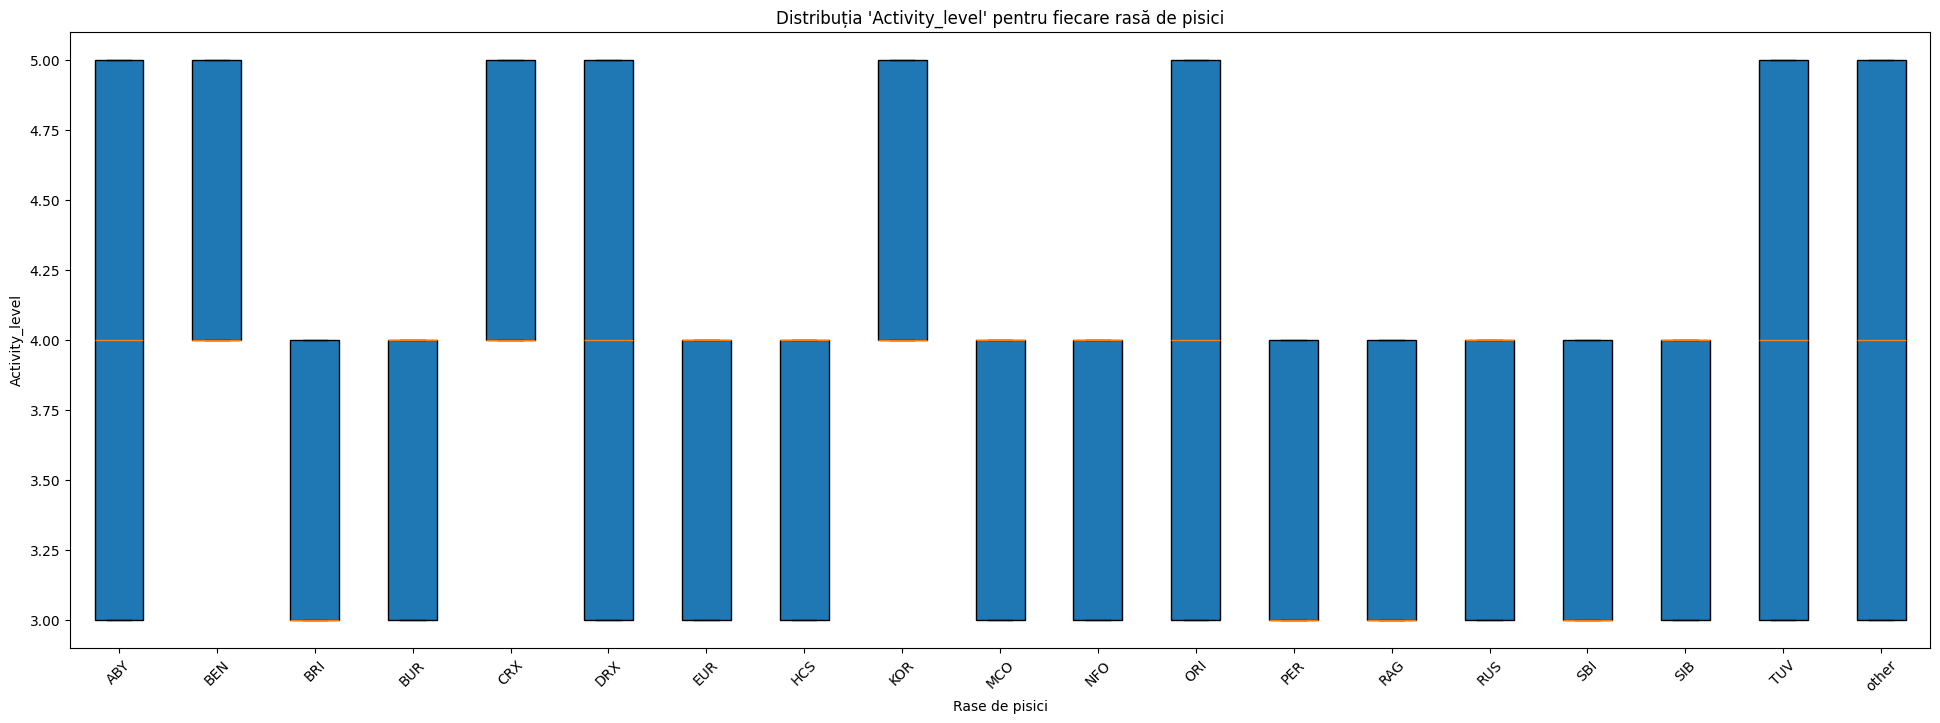

In [27]:
show_boxplots_for_attribute('Activity_level')

In [45]:
for breed in df['Breed_group'].unique():
    edit_outliers(df, 'Weaning_age', breed)
    edit_outliers(df, 'Outdoors', breed)
    edit_outliers(df, 'Contact_people', breed)
    edit_outliers(df, 'Aggression_stranger', breed)
    edit_outliers(df, 'Aggression_owner', breed)
    edit_outliers(df, 'Aggression_cats', breed)
    edit_outliers(df, 'Shyness_novel', breed)
    edit_outliers(df, 'Shyness_strangers', breed)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5360\2844554183.py:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[2.   2.   3.   1.75 3.   1.75 2.   1.75 2.   2.   2.   3.   2.   3.
 2.   2.   3.   2.   2.   2.   2.   3.   2.   2.   1.75 3.   2.   2.
 2.   3.   1.75 1.75 3.   2.   3.   3.   3.   1.75 1.75 3.   2.   2.
 3.   2.   2.   3.   2.   2.   2.   3.   3.   2.   1.75 1.75 2.   3.
 2.   2.   3.   1.75 1.75 3.   1.75 3.   3.   3.   1.75 1.75 3.   3.
 3.   2.   1.75 2.   3.   1.75 1.75 1.75 1.75 3.   1.75 3.   2.   1.75
 3.   3.   2.   2.   3.   2.   2.   3.   2.   2.   3.   3.   2.   2.
 3.   2.   1.75 1.75 2.   1.75 3.   2.   1.75 3.   1.75 1.75 2.   3.
 3.   2.   3.   2.   3.   1.75 1.75 3.   2.   2.   2.   3.   3.   3.
 1.75 2.   3.   3.   3.   1.75 3.   3.   3.   3.   2.   3.   3.   2.
 3.   2.   3.   3.   1.75 3.   3.   3.   2.   1.75 3.   1.75 3.   3.
 1.75 3.   2.   1.75 2.   1.75 2.   2.   2.

In [49]:
# Calcularea numarului duplicatelor
duplicates = df[df.duplicated()]
print(f"Numarul instantelor duplicate sunt: {duplicates.shape[0]}")

Numarul instantelor duplicate sunt: 32


In [50]:
df = df.drop_duplicates()

In [51]:
df.drop(['Grooming', 'Wool_sucking', 'Behaviour_problem', 'Aggression_component', 'Shyness_component', 'Extraversion_component'], axis=1, inplace=True)

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1. Codificăm etichetele (Breed)
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(df[['Breed_group']]).toarray()  # Convertim în One-Hot Encoding

# 2. Selectăm caracteristicile (X) și normalizăm
X = df[[col for col in df.columns if col != 'Breed_group']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Împărțim setul de date în antrenare și test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 4. Construim modelul neuronal
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train.shape[1],)),  # Primul strat ascuns
    Dense(8, activation='relu'),  # Al doilea strat ascuns
    Dense(y_train.shape[1], activation='softmax')  # Strat de ieșire pentru clasificare multi-clasă
])

# 5. Compilăm modelul
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Funcția de pierdere pentru clasificare multi-clasă
    metrics=['accuracy']
)

# 6. Antrenăm modelul
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,  # Număr de epoci
    batch_size=8,  # Dimensiunea batch-ului
    verbose=1
)

# 7. Evaluăm modelul
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acuratețea pe setul de test: {accuracy:.2f}")

Epoch 1/50


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.0905 - loss: 2.9099 - val_accuracy: 0.1659 - val_loss: 2.6368
Epoch 2/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1772 - loss: 2.6193 - val_accuracy: 0.2256 - val_loss: 2.4830
Epoch 3/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2121 - loss: 2.5129 - val_accuracy: 0.2423 - val_loss: 2.3708
Epoch 4/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2515 - loss: 2.3627 - val_accuracy: 0.2616 - val_loss: 2.2956
Epoch 5/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2501 - loss: 2.3220 - val_accuracy: 0.2687 - val_loss: 2.2493
Epoch 6/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2447 - loss: 2.2606 - val_accuracy: 0.2836 - val_loss: 2.2138
Epoch 7/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2755 - loss: 2.2240 - val_accuracy: 0.2783 - val_loss: 2.1900
Epoch 8/50
570/570 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2733 - loss: 2.1972 - val_accuracy: 0.2862 - val_

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# 1. Codificăm etichetele (Breed)
encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(df[['Breed_group']]).toarray()  # Convertim în One-Hot Encoding

# 2. Selectăm caracteristicile (X) și normalizăm
X = df[[col for col in df.columns if col != 'Breed_group']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Împărțim setul de date în antrenare și test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)

# 4. Aplicăm SMOTE doar pe setul de antrenare
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 5. Construim modelul neuronal
model = Sequential([
    Dense(16, activation='relu', input_shape=(X_train_resampled.shape[1],)),  # Primul strat ascuns
    Dense(8, activation='relu'),  # Al doilea strat ascuns
    Dense(y_train_resampled.shape[1], activation='softmax')  # Strat de ieșire pentru clasificare multi-clasă
])

# 6. Compilăm modelul
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',  # Funcția de pierdere pentru clasificare multi-clasă
    metrics=['accuracy']
)

# 7. Antrenăm modelul
history = model.fit(
    X_train_resampled, y_train_resampled,
    validation_data=(X_test, y_test),
    epochs=50,  # Număr de epoci
    batch_size=8,  # Dimensiunea batch-ului
    verbose=1
)

# 8. Evaluăm modelul
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acuratețea pe setul de test: {accuracy:.2f}")

Epoch 1/50


C:\Users\Admin\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.1202 - loss: 2.8244 - val_accuracy: 0.2274 - val_loss: 2.4147
Epoch 2/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 2s 963us/step - accuracy: 0.1975 - loss: 2.3841 - val_accuracy: 0.2450 - val_loss: 2.2515
Epoch 3/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 940us/step - accuracy: 0.2246 - loss: 2.2832 - val_accuracy: 0.2476 - val_loss: 2.2259
Epoch 4/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 926us/step - accuracy: 0.2373 - loss: 2.2247 - val_accuracy: 0.2520 - val_loss: 2.1874
Epoch 5/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 944us/step - accuracy: 0.2521 - loss: 2.1757 - val_accuracy: 0.2590 - val_loss: 2.1718
Epoch 6/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.2571 - loss: 2.1521 - val_accuracy: 0.2669 - val_loss: 2.1341
Epoch 7/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 917us/step - accuracy: 0.2641 - loss: 2.1396 - val_accuracy: 0.2660 - val_loss: 2.1357
Epoch 8/50
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 912us/step - accuracy: 0.2738 - loss: 2.1163